# Final Project

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Cleaning

Data cleaning is a crucial step in the data preparation process for any analysis, modeling, or decision-making task involving data. It involves identifying and rectifying errors, inconsistencies, inaccuracies, and other issues present in a dataset. 

## Reading and understanding our data

In [2]:
df = pd.read_csv("/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

According to the output we have  308854 (0 to 308853), as well as 81 features with "Heart_Disease" as target variable. Fortunaly the ir no miising values for all the features and the target variable.

## Statistical Description

Use descib e method in order to describe the columns using first order statistcal descriptos.

This description only has performed in numeric values.

In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Tranform Heart_Disease column to binary

In order to use in the following analysis wee need to tranform thsi column to numeric.

In [5]:
df["Heart_Disease"].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df["Heart_Disease"].value_counts()

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

In [7]:
binary_values = {'No': 0, 'Yes': 1}

# Replace values using the dictionary
df["Heart_Disease"] = df["Heart_Disease"].replace(binary_values)

In [8]:
df["Heart_Disease"].value_counts()

0    283883
1     24971
Name: Heart_Disease, dtype: int64

## Look for correlations

We use corr() method from our pandas object in order to look for correlations between the features. The correlation performed is based in Coeficient Pearsonn Correlation that is the noramlized form of covariance, that indicates correlation between variables, when 1 is potivie correlation, -1 is negative correlation and 0 means ther is no corelation. Remember only aplies to numeric values.

In [9]:
hous_num = df.select_dtypes(include = ['float64', 'int64'])
hous_num.corr()

,Heart_Disease,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Heart_Disease,1.000000,0.015780,0.045875,0.042666,-0.036569,-0.020055,-0.024043,-0.009227
Height_(cm),0.015780,1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.045875,0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,0.042666,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,-0.036569,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.020055,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.024043,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,-0.009227,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


Now only use see correlations between te features and the outpút, but establishing an thrshold of 0.5 in order to visualize the more correlated features with the output (negative and positive correlation)

In [10]:
hous_num_corr = hous_num.corr()["Heart_Disease"][1:]
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with SalePrice:
Series([], Name: Heart_Disease, dtype: float64)


There is no correlated features.

see more closed the values.

In [11]:
hous_num_corr

Height_(cm)                     0.015780
Weight_(kg)                     0.045875
BMI                             0.042666
Alcohol_Consumption            -0.036569
Fruit_Consumption              -0.020055
Green_Vegetables_Consumption   -0.024043
FriedPotato_Consumption        -0.009227
Name: Heart_Disease, dtype: float64

Now, let's generate some bar plots.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


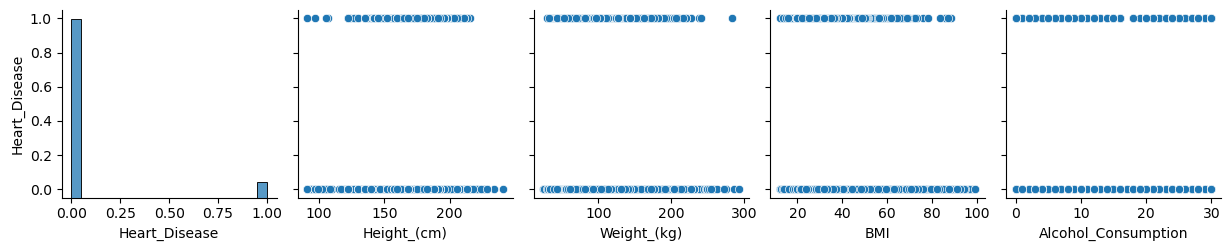

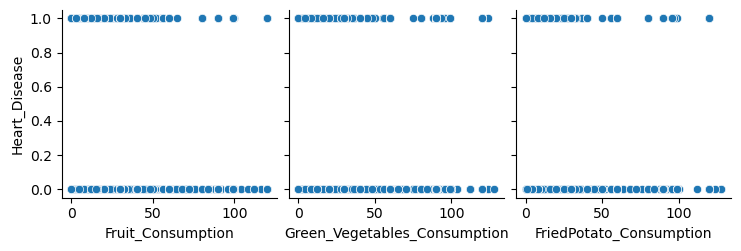

In [12]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                 x_vars=hous_num.columns[i:i+5],
                 y_vars=['Heart_Disease'])